# CHAPTER 6 Data Loading, Storage, and File Formats

## Reading and Writing Data in Text Format

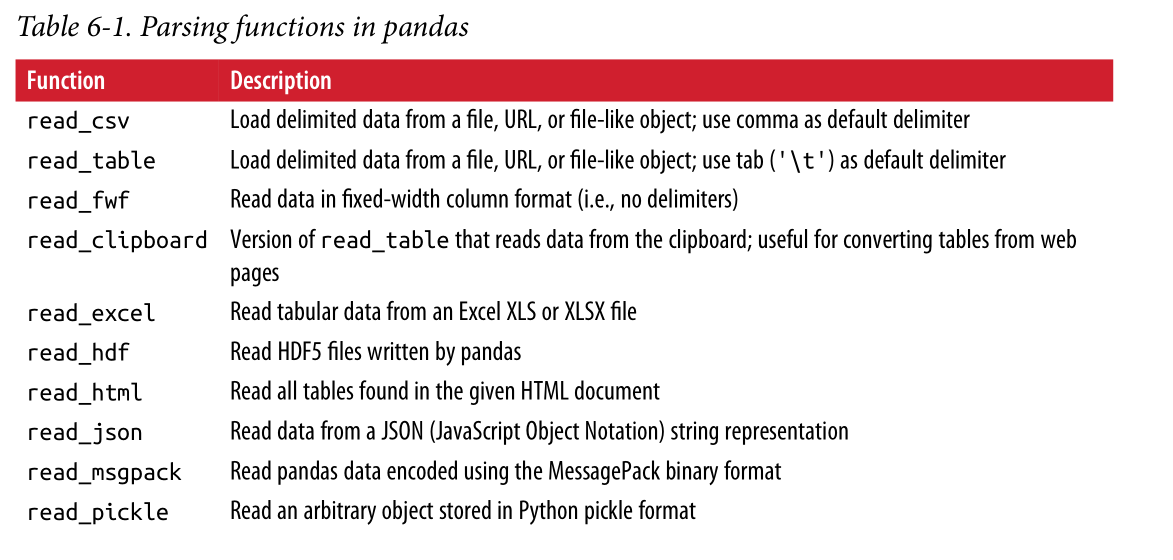

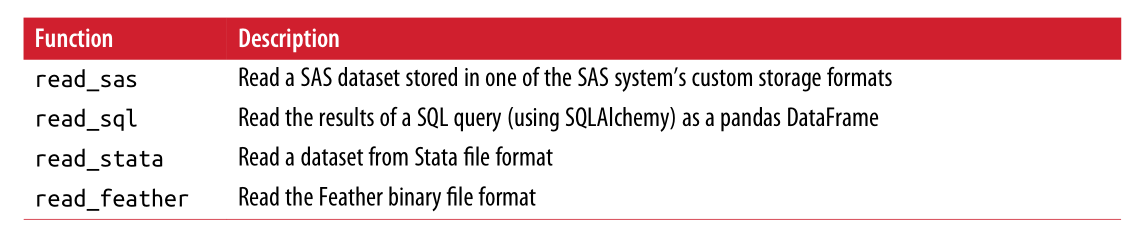

In [1]:
!type examples\ex1.csv
# 在win下使用反斜杠\，在Linux下使用斜杠/

a,b,c,d,message
1,2,3,4,hello
5,6,7,8,world
9,10,11,12,foo


In [2]:
import pandas as pd
import numpy as np
# Since this is comma-delimited, we can use read_csv to read it into a DataFrame:
df = pd.read_csv('examples\ex1.csv')
df

,a,b,c,d,message
0,1,2,3,4,hello
1,5,6,7,8,world
2,9,10,11,12,foo


In [3]:
# We could also have used read_table and specified the delimiter:
pd.read_table('examples/ex1.csv',delimiter=',')

,a,b,c,d,message
0,1,2,3,4,hello
1,5,6,7,8,world
2,9,10,11,12,foo


In [4]:
# A file will not always have a header row. Consider this file:
!type examples\ex2.csv

1,2,3,4,hello
5,6,7,8,world
9,10,11,12,foo


In [5]:
#To read this file, you have a couple of options. You can allow pandas to assign default
# column names, or you can specify names yourself:
pd.read_csv('examples\ex2.csv',header=None)

,0,1,2,3,4
0,1,2,3,4,hello
1,5,6,7,8,world
2,9,10,11,12,foo


In [6]:
pd.read_csv('examples/ex2.csv', names=['a', 'b', 'c', 'd', 'message'])

,a,b,c,d,message
0,1,2,3,4,hello
1,5,6,7,8,world
2,9,10,11,12,foo


In [7]:
# Suppose you wanted the message column to be the index of the returned DataFrame.
# You can either indicate you want the column at index 4 or named 'message' using
# the index_col argument:
names = ['a','b','c','d','message']
pd.read_csv('examples\ex2.csv',names=names, index_col='message')

,a,b,c,d
message,,,,
hello,1,2,3,4
world,5,6,7,8
foo,9,10,11,12


In [8]:
# In the event that you want to form a hierarchical index from multiple columns, pass a
# list of column numbers or names:
!type examples\csv_mindex.csv

key1,key2,value1,value2
one,a,1,2
one,b,3,4
one,c,5,6
one,d,7,8
two,a,9,10
two,b,11,12
two,c,13,14
two,d,15,16


In [9]:
parsed = pd.read_csv('examples\csv_mindex.csv',
                    index_col=['key1','key2'])
parsed

value1  value2
key1 key2                
one  a          1       2
     b          3       4
     c          5       6
     d          7       8
two  a          9      10
     b         11      12
     c         13      14
     d         15      16

In [10]:
# In some cases, a table might not have a fixed delimiter, using whitespace or some
# other pattern to separate fields. Consider a text file that looks like this:
list(open('examples\ex3.txt'))

['            A         B         C\n',
 'aaa -0.264438 -1.026059 -0.619500\n',
 'bbb  0.927272  0.302904 -0.032399\n',
 'ccc -0.264273 -0.386314 -0.217601\n',
 'ddd -0.871858 -0.348382  1.100491\n']

In [11]:
# While you could do some munging by hand, the fields here are separated by a vari‐
# able amount of whitespace. In these cases, you can pass a regular expression as a
# delimiter for read_table. This can be expressed by the regular expression \s+, so we
# have then:
result = pd.read_table('examples/ex3.txt', sep='\s+')
result
# Because there was one fewer column name than the number of data rows,
# read_table infers that the first column should be the DataFrame’s index in this spe‐
# cial case.

,A,B,C
aaa,-0.264438,-1.026059,-0.619500
bbb,0.927272,0.302904,-0.032399
ccc,-0.264273,-0.386314,-0.217601
ddd,-0.871858,-0.348382,1.100491


In [12]:
# The parser functions have many additional arguments to help you handle the wide
# variety of exception file formats that occur (see a partial listing in Table 6-2). For
# example, you can skip the first, third, and fourth rows of a file with skiprows:
!type examples\ex4.csv

# hey!
a,b,c,d,message
# just wanted to make things more difficult for you
# who reads CSV files with computers, anyway?
1,2,3,4,hello
5,6,7,8,world
9,10,11,12,foo


In [13]:
pd.read_csv('examples\ex4.csv', skiprows=[0, 2, 3])

,a,b,c,d,message
0,1,2,3,4,hello
1,5,6,7,8,world
2,9,10,11,12,foo


In [14]:
# Handling missing values is an important and frequently nuanced part of the file pars‐
# ing process. Missing data is usually either not present (empty string) or marked by
# some sentinel value. By default, pandas uses a set of commonly occurring sentinels,
# such as NA and NULL:
!type examples\ex5.csv

something,a,b,c,d,message
one,1,2,3,4,NA
two,5,6,,8,world
three,9,10,11,12,foo


In [15]:
result = pd.read_csv('examples\ex5.csv')
result

,something,a,b,c,d,message
0,one,1,2,3.0,4,NaN
1,two,5,6,NaN,8,world
2,three,9,10,11.0,12,foo


In [16]:
pd.isna(result)

,something,a,b,c,d,message
0,False,False,False,False,False,True
1,False,False,False,True,False,False
2,False,False,False,False,False,False


In [17]:
pd.isnull(result)

,something,a,b,c,d,message
0,False,False,False,False,False,True
1,False,False,False,True,False,False
2,False,False,False,False,False,False


In [18]:
# The na_values option can take either a list or set of strings to consider missing
# values:
result = pd.read_csv('examples/ex5.csv', na_values=['NULL'])
result

,something,a,b,c,d,message
0,one,1,2,3.0,4,NaN
1,two,5,6,NaN,8,world
2,three,9,10,11.0,12,foo


In [19]:
# Different NA sentinels can be specified for each column in a dict:
sentinels = {'message': ['foo', 'NA'], 'something': ['two']}
pd.read_csv('examples/ex5.csv', na_values=sentinels)

,something,a,b,c,d,message
0,one,1,2,3.0,4,NaN
1,NaN,5,6,NaN,8,world
2,three,9,10,11.0,12,NaN


### Reading Text Files in Pieces

In [20]:
# Before we look at a large file, we make the pandas display settings more compact:
pd.options.display.max_rows = 10

In [21]:
result = pd.read_csv('examples\ex6.csv')
result

,one,two,three,four,key
0,0.467976,-0.038649,-0.295344,-1.824726,L
1,-0.358893,1.404453,0.704965,-0.200638,B
2,-0.501840,0.659254,-0.421691,-0.057688,G
3,0.204886,1.074134,1.388361,-0.982404,R
4,0.354628,-0.133116,0.283763,-0.837063,Q
...,...,...,...,...,...
9995,2.311896,-0.417070,-1.409599,-0.515821,L
9996,-0.479893,-0.650419,0.745152,-0.646038,E
9997,0.523331,0.787112,0.486066,1.093156,K
9998,-0.362559,0.598894,-1.843201,0.887292,G


In [22]:
# If you want to only read a small number of rows (avoiding reading the entire file),
# specify that with nrows:
pd.read_csv('examples\ex6.csv', nrows=5)

,one,two,three,four,key
0,0.467976,-0.038649,-0.295344,-1.824726,L
1,-0.358893,1.404453,0.704965,-0.200638,B
2,-0.501840,0.659254,-0.421691,-0.057688,G
3,0.204886,1.074134,1.388361,-0.982404,R
4,0.354628,-0.133116,0.283763,-0.837063,Q


In [23]:
# To read a file in pieces, specify a chunksize as a number of rows:
chunker = pd.read_csv('examples\ex6.csv', chunksize=1000)
chunker

In [24]:
# The TextParser object returned by read_csv allows you to iterate over the parts of
# the file according to the chunksize. For example, we can iterate over ex6.csv, aggre‐
# gating the value counts in the 'key' column like so:
tot = pd.Series([])
for piece in chunker:
    tot = tot.add(piece['key'].value_counts(),fill_value=0)
tot = tot.sort_values(ascending=False)

<ipython-input-24-7e77beca2328>:4: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  tot = pd.Series([])


In [25]:
tot

E    368.0
X    364.0
L    346.0
O    343.0
Q    340.0
     ...  
5    157.0
2    152.0
0    151.0
9    150.0
1    146.0
Length: 36, dtype: float64

### Writing Data to Text Format

In [26]:
data = pd.read_csv('examples\ex5.csv')
data

,something,a,b,c,d,message
0,one,1,2,3.0,4,NaN
1,two,5,6,NaN,8,world
2,three,9,10,11.0,12,foo


In [27]:
# Using DataFrame’s to_csv method, we can write the data out to a comma-separated
# file:
data.to_csv('examples\out.csv')

In [28]:
!type examples\out.csv

,something,a,b,c,d,message
0,one,1,2,3.0,4,
1,two,5,6,,8,world
2,three,9,10,11.0,12,foo


In [29]:
# Other delimiters can be used, of course (writing to sys.stdout so it prints the text
# result to the console):
import sys

data.to_csv(sys.stdout, sep='|')

|something|a|b|c|d|message
0|one|1|2|3.0|4|
1|two|5|6||8|world
2|three|9|10|11.0|12|foo


In [30]:
# Missing values appear as empty strings in the output. You might want to denote them
# by some other sentinel value:
data.to_csv(sys.stdout, na_rep='NULL')

,something,a,b,c,d,message
0,one,1,2,3.0,4,NULL
1,two,5,6,NULL,8,world
2,three,9,10,11.0,12,foo


In [31]:
# With no other options specified, both the row and column labels are written. Both of
# these can be disabled:
data.to_csv(sys.stdout, index=False, header=False)

one,1,2,3.0,4,
two,5,6,,8,world
three,9,10,11.0,12,foo


In [32]:
# You can also write only a subset of the columns, and in an order of your choosing:
data.to_csv(sys.stdout, index=False, columns=['a', 'b', 'c'])

a,b,c
1,2,3.0
5,6,
9,10,11.0


In [33]:
# Series also has a to_csv method:
dates = pd.date_range('1/1/2000', periods=7)
dates

DatetimeIndex(['2000-01-01', '2000-01-02', '2000-01-03', '2000-01-04',
               '2000-01-05', '2000-01-06', '2000-01-07'],
              dtype='datetime64[ns]', freq='D')

In [34]:
ts = pd.Series(np.arange(7),index=dates)
ts

2000-01-01    0
2000-01-02    1
2000-01-03    2
2000-01-04    3
2000-01-05    4
2000-01-06    5
2000-01-07    6
Freq: D, dtype: int32

In [35]:
ts.to_csv('examples/tseries.csv')

In [36]:
!type examples\tseries.csv

,0
2000-01-01,0
2000-01-02,1
2000-01-03,2
2000-01-04,3
2000-01-05,4
2000-01-06,5
2000-01-07,6


### Working with Delimited Formats

In [37]:
# It’s possible to load most forms of tabular data from disk using functions like pan
# das.read_table. In some cases, however, some manual processing may be necessary.
# It’s not uncommon to receive a file with one or more malformed lines that trip up
# read_table. To illustrate the basic tools, consider a small CSV file:
!type examples\ex7.csv

"a","b","c"
"1","2","3"
"1","2","3"


In [38]:
# For any file with a single-character delimiter, you can use Python’s built-in csv mod‐
# ule. To use it, pass any open file or file-like object to csv.reader:
import csv
f = open('examples\ex7.csv')

reader = csv.reader(f)

In [39]:
for line in reader:
    print(line)

['a', 'b', 'c']
['1', '2', '3']
['1', '2', '3']


In [49]:
# From there, it’s up to you to do the wrangling necessary to put the data in the form
# that you need it. Let’s take this step by step. First, we read the file into a list of lines:
with open('examples\ex7.csv') as f:
    lines = list(csv.reader(f))

In [50]:
# Then, we split the lines into the header line and the data lines:
header, values = lines[0], lines[1:]

In [51]:
# Then we can create a dictionary of data columns using a dictionary comprehension
# and the expression zip(*values), which transposes rows to columns:
data_dict = {h: v for h, v in zip(header, zip(*values))}
data_dict

{'a': ('1', '1'), 'b': ('2', '2'), 'c': ('3', '3')}

In [52]:
# CSV files come in many different flavors. To define a new format with a different
# delimiter, string quoting convention, or line terminator, we define a simple subclass
# of csv.Dialect:
class my_dialect(csv.Dialect):
    lineterminator = '\n'
    delimiter = ';'
    quotechar = '"'
    quoting = csv.QUOTE_MINIMAL


In [60]:
with open('examples\ex7.csv') as f:
    reader = csv.reader(f, dialect=my_dialect)
    for line in reader:
        print(line)

['a,"b","c"']
['1,"2","3"']
['1,"2","3"']


In [61]:
# To write delimited files manually, you can use csv.writer. It accepts an open, writa‐
# ble file object and the same dialect and format options as csv.reader:
with open('mydata.csv', 'w') as f:
    writer = csv.writer(f, dialect=my_dialect)
    writer.writerow(('one', 'two', 'three'))
    writer.writerow(('1', '2', '3'))
    writer.writerow(('4', '5', '6'))
    writer.writerow(('7', '8', '9'))

### JSON Data

In [62]:
import json

In [69]:
obj = """
{"name": "Wes",
"places_lived": ["United States", "Spain", "Germany"],
"pet": null,
"siblings": [{"name": "Scott", "age": 30, "pets": ["Zeus", "Zuko"]},
{"name": "Katie", "age": 38,
"pets": ["Sixes", "Stache", "Cisco"]}]
}
"""

In [70]:
result = json.loads(obj)
result

{'name': 'Wes',
 'places_lived': ['United States', 'Spain', 'Germany'],
 'pet': None,
 'siblings': [{'name': 'Scott', 'age': 30, 'pets': ['Zeus', 'Zuko']},
  {'name': 'Katie', 'age': 38, 'pets': ['Sixes', 'Stache', 'Cisco']}]}

In [71]:
# json.dumps, on the other hand, converts a Python object back to JSON:
asjson = json.dumps(result)
asjson

'{"name": "Wes", "places_lived": ["United States", "Spain", "Germany"], "pet": null, "siblings": [{"name": "Scott", "age": 30, "pets": ["Zeus", "Zuko"]}, {"name": "Katie", "age": 38, "pets": ["Sixes", "Stache", "Cisco"]}]}'

In [72]:
# How you convert a JSON object or list of objects to a DataFrame or some other data
# structure for analysis will be up to you. Conveniently, you can pass a list of dicts
# (which were previously JSON objects) to the DataFrame constructor and select a sub‐
# set of the data fields:
siblings = pd.DataFrame(result['siblings'], columns=['name', 'age'])
siblings

,name,age
0,Scott,30
1,Katie,38


In [73]:
# The pandas.read_json can automatically convert JSON datasets in specific arrange‐
# ments into a Series or DataFrame. For example:
!type examples\example.json

[{"a": 1, "b": 2, "c": 3},
 {"a": 4, "b": 5, "c": 6},
 {"a": 7, "b": 8, "c": 9}]


In [74]:
# The default options for pandas.read_json assume that each object in the JSON array
# is a row in the table:
data = pd.read_json('examples\example.json')
data

,a,b,c
0,1,2,3
1,4,5,6
2,7,8,9


In [75]:
# If you need to export data from pandas to JSON, one way is to use the to_json meth‐
# ods on Series and DataFrame:
print(data.to_json())

{"a":{"0":1,"1":4,"2":7},"b":{"0":2,"1":5,"2":8},"c":{"0":3,"1":6,"2":9}}


In [76]:
print(data.to_json(orient='records'))

[{"a":1,"b":2,"c":3},{"a":4,"b":5,"c":6},{"a":7,"b":8,"c":9}]


### XML and HTML: Web Scraping

pandas has a built-in function, read_html, which uses libraries like lxml and Beauti‐
ful Soup to automatically parse tables out of HTML files as DataFrame objects. To
show how this works, I downloaded an HTML file (used in the pandas documenta‐
tion) from the United States FDIC government agency showing bank failures.1 First,
you must install some additional libraries used by read_html:

conda install lxml

pip install beautifulsoup4 html5lib

In [77]:
# The pandas.read_html function has a number of options, but by default it searches
# for and attempts to parse all tabular data contained within <table> tags. The result is
# a list of DataFrame objects:
tables = pd.read_html('examples/fdic_failed_bank_list.html')

In [78]:
len(tables)

1

In [79]:
failures = tables[0]

In [80]:
failures.head()

,Bank Name,City,ST,CERT,Acquiring Institution,Closing Date,Updated Date
0,Allied Bank,Mulberry,AR,91,Today's Bank,"September 23, 2016","November 17, 2016"
1,The Woodbury Banking Company,Woodbury,GA,11297,United Bank,"August 19, 2016","November 17, 2016"
2,First CornerStone Bank,King of Prussia,PA,35312,First-Citizens Bank & Trust Company,"May 6, 2016","September 6, 2016"
3,Trust Company Bank,Memphis,TN,9956,The Bank of Fayette County,"April 29, 2016","September 6, 2016"
4,North Milwaukee State Bank,Milwaukee,WI,20364,First-Citizens Bank & Trust Company,"March 11, 2016","June 16, 2016"


In [81]:
# As you will learn in later chapters, from here we could proceed to do some data
# cleaning and analysis, like computing the number of bank failures by year:
close_timestamps = pd.to_datetime(failures['Closing Date'])
close_timestamps.dt.year.value_counts()

2010    157
2009    140
2011     92
2012     51
2008     25
       ... 
2001      4
2004      4
2003      3
2007      3
2000      2
Name: Closing Date, Length: 15, dtype: int64